In [1]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup

In [5]:
headers ={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page=1', headers=headers).text

In [6]:
soup = BeautifulSoup(webpage, 'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   List of companies - 760.6k companies | AmbitionBox
  </title>
  <meta content="2022 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/>
  <meta content="712617688793459" data-n-head="ssr" property="fb:app_id"/>
  <meta content="#ffffff" data-n-head="ssr" name="theme-color"/>
  <meta content="#ffffff" data-n-head="ssr" name="msapplication-navbutton-color"/
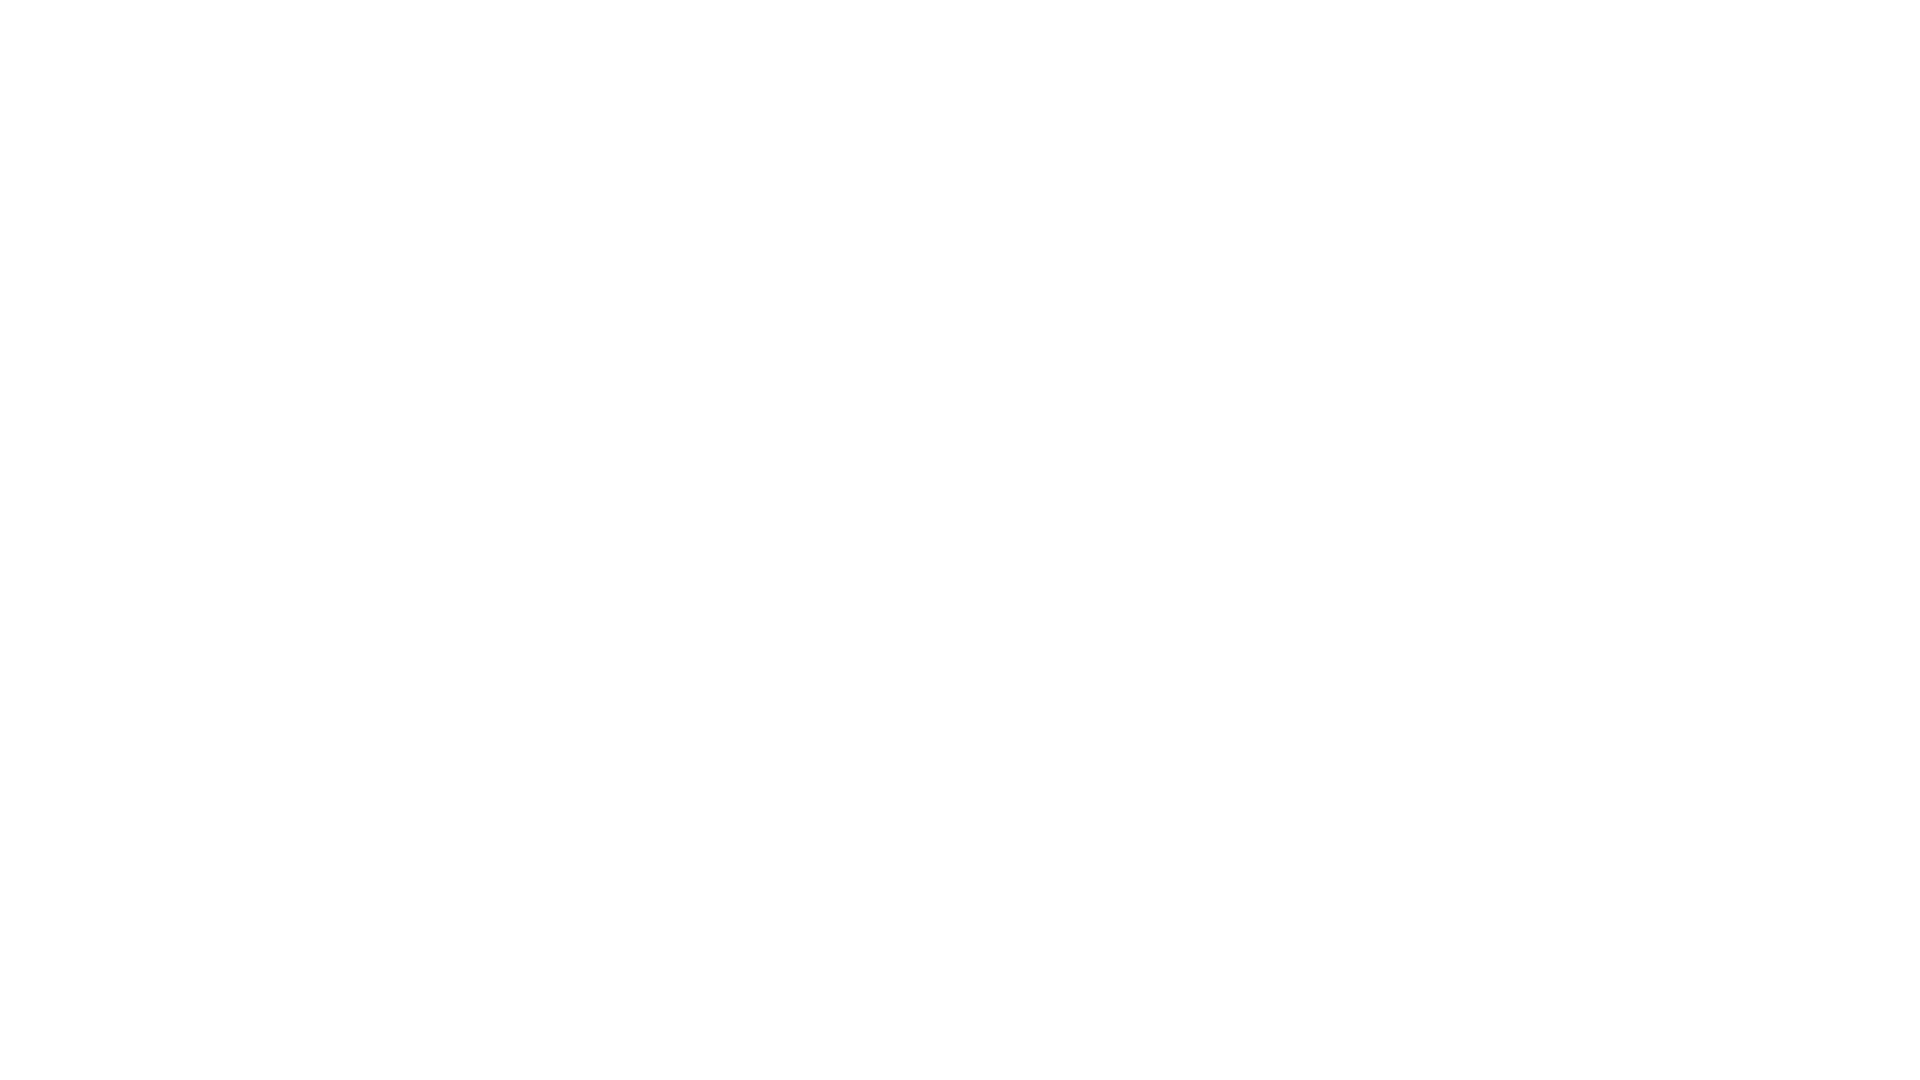

In [9]:
print(soup.prettify())

In [7]:
soup.find_all('h1')[0].text

'List of companies in India'

In [8]:
for i in soup.find_all('h2'):
    print(i.text.strip())

TCS
Accenture
Cognizant
ICICI Bank
HDFC Bank
Wipro
Infosys
Capgemini
Tech Mahindra
Genpact
HCLTech
Amazon
Axis Bank
IBM
Concentrix Corpo...
Reliance jio
Larsen & Toubro ...
Vodafone Idea
HDB Financial Se...
Teleperformance
Kotak Mahindra B...
Reliance Industr...
Reliance Retail
Bharti Airtel
Deloitte
Tata Motors
BYJU'S
WNS
Flipkart
Mahindra & Mahin...


In [10]:
for i in soup.find_all('p'):
    print(i.text.strip())

AmbitionBox
Discover Best Places to work in India
AmbitionBox
Discover best places to work
Compare & find best workplace
Read reviews for 6L+ companies
Rate your former or current company
Discover salaries for 6L+ companies
Calculate your take home salary
Check your market value
Help other jobseekers
Read interviews for 40K+ companies
Interviews questions for 1K+ colleges
Contribute your interview questions
Discover Best Places to Work!
Company reviews. Salaries. Interviews. Jobs.
About Company
7,60,581 unique
			companies found
Sort By:
Popular
3.9
#6 Best Mega Company - 2021
Public
Mumbai,Maharashtra + 280 more
54 years old
1 Lakh+ Employees (India)
We ensure the highest levels of certainty and satisfaction through a deep-set commitment to our clients, comprehensive industry expertise and a global network of innovation and delivery centers.

We function as a full stakeholder to business, offering a consulting-led approach with an integrated portfolio of technology led solutions that 

In [11]:
len(soup.find_all('p', class_ = 'rating'))

30

In [12]:
company = soup.find_all('div', class_='company-content-wrapper')

In [13]:
len(company)

30

In [14]:
name=[]
rating=[]
reviews=[]
ctype=[]
hq=[]
how_old=[]
no_of_employee=[]

for i in company:

  name.append(i.find('h2').text.strip())
  rating.append(i.find('p',class_='rating').text.strip())
  reviews.append(i.find('a' , class_='review-count').text.strip())
  ctype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
  hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
  how_old.append(i.find_all('p',class_='infoEntity')[2].text.strip())
  no_of_employee.append(i.find_all('p',class_='infoEntity')[3].text.strip())

df=pd.DataFrame({'name':name,
   'rating':rating,
   'reviews':reviews,
   'company_type':ctype,
   'Head_Quarters':hq,
   'Company_Age':how_old,
   'No_of_Employee':no_of_employee,
   })

In [18]:
final=pd.DataFrame()
for j in range(1,1001):
    webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page={}'.format(j)).text
    soup=BeautifulSoup(webpage,'lxml')
    company=soup.find_all('div',class_='company-content-wrapper')
name=[]
rating=[]
reviews=[]
ctype=[]
hq=[]
how_old=[]
no_of_employee=[]

for i in company:
    try:
        name.append(i.find('h2').text.strip())
    except:
        name.append(np.nan)

    try:
        rating.append(i.find('p',class_='rating').text.strip())
    except:
        rating.append(np.nan)
   
    try:
        reviews.append(i.find('a' , class_='review-count').text.strip())
    except:
        reviews.append(np.nan)

    try:
        ctype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
    except:
        ctype.append(np.nan)
        
    try:
        hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
    except:
        hq.append(np.nan)
    
    try:
        how_old.append(i.find_all('p',class_='infoEntity')[2].text.strip())
    except:
        how_old.append(np.nan)
        
    try:
        no_of_employee.append(i.find_all('p',class_='infoEntity')[3].text.strip())
    except:
        no_of_employee.append(np.nan)
    

df=pd.DataFrame({'name':name,'rating':rating,'reviews':reviews,'company_type':ctype,'Head_Quarters':hq,'Company_Age':how_old,'No_of_Employee':no_of_employee,})

final=final.append(df,ignore_index=True)





ConnectionError: HTTPSConnectionPool(host='www.ambitionbox.com', port=443): Max retries exceeded with url: /list-of-companies?page=1 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000019BBB2F4940>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed'))